In [2]:
# Logistic Regression on Breast Cancer Wisconsin Dataset

import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("/content/drive/MyDrive/data.csv")

print("First 5 rows:")
print(data.head())

# Drop unnecessary columns (id, unnamed)
data = data.drop(["id", "Unnamed: 32"], axis=1)

# Encode target: M=Malignant (1), B=Benign (0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

In [3]:
# Step 2: Train-test split & standardize
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Step 3: Fit Logistic Regression
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)


Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC: 0.996031746031746


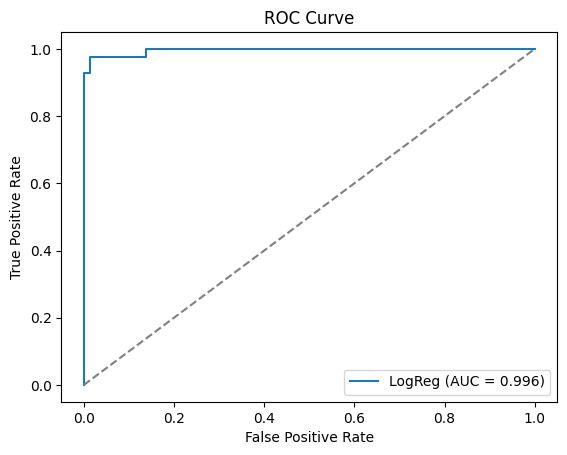

In [5]:
# Step 4: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for class 1

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="LogReg (AUC = %.3f)" % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


With threshold = 0.3:
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision: 0.9761904761904762
Recall: 0.9761904761904762


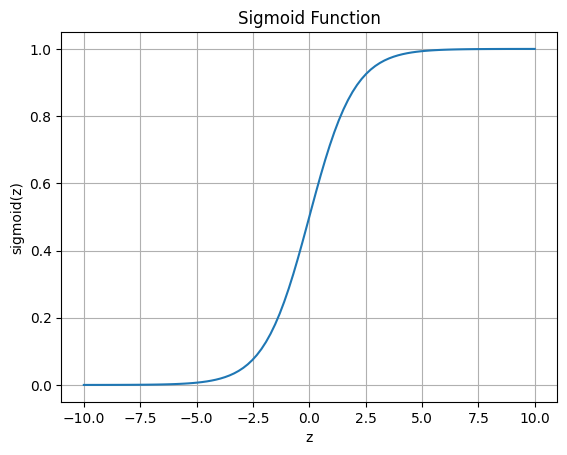

In [6]:
# Step 5: Tune threshold
default_preds = (y_prob >= 0.5).astype(int)
custom_preds = (y_prob >= 0.3).astype(int)  # lower threshold = more positives

print("\nWith threshold = 0.3:")
print("Confusion Matrix:\n", confusion_matrix(y_test, custom_preds))
print("Precision:", precision_score(y_test, custom_preds))
print("Recall:", recall_score(y_test, custom_preds))

# Explain Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 100)
plt.plot(z_values, sigmoid(z_values))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
